In [1]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# ===============================
# 2. LOAD DATA (TABLE)
# ===============================
df = pd.read_csv("health_data.csv")

df.head()

,Age,Gender,BMI,BloodPressure,Smoking,PhysicalActivity,Cholesterol,Diabetes,HeartDisease
0,45,M,27.5,130,Yes,Low,220,No,1
1,50,F,31.2,140,No,Medium,240,Yes,1
2,38,M,24.8,120,No,High,180,No,0
3,60,F,29.4,150,Yes,Low,260,Yes,1
4,42,M,26.1,128,No,Medium,200,No,0


*Insight:* The dataset contains 15 patient records with 9 features, including age, BMI, blood pressure, lifestyle factors, and heart disease outcome.

In [2]:
# ===============================
# 3. DATA OVERVIEW
# ===============================
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               15 non-null     int64  
 1   Gender            15 non-null     object 
 2   BMI               15 non-null     float64
 3   BloodPressure     15 non-null     int64  
 4   Smoking           15 non-null     object 
 5   PhysicalActivity  15 non-null     object 
 6   Cholesterol       15 non-null     int64  
 7   Diabetes          15 non-null     object 
 8   HeartDisease      15 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.2+ KB


(None,
              Age        BMI  BloodPressure  Cholesterol  HeartDisease
 count  15.000000  15.000000      15.000000    15.000000     15.000000
 mean   48.733333  28.260000     136.200000   226.333333      0.533333
 std     9.794070   3.680994      13.805796    41.467141      0.516398
 min    34.000000  21.900000     115.000000   165.000000      0.000000
 25%    41.000000  25.650000     126.500000   195.000000      0.000000
 50%    48.000000  28.900000     135.000000   220.000000      1.000000
 75%    56.500000  30.850000     146.500000   262.500000      1.000000
 max    65.000000  34.000000     160.000000   290.000000      1.000000)

*Insight:* Patients with heart disease tend to have higher BMI, blood pressure, cholesterol, and glucose values compared to those without.

In [3]:
# ===============================
# 4. ENCODE CATEGORICAL VARIABLES
# ===============================
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['PhysicalActivity'] = df['PhysicalActivity'].map({
    'Low': 0, 'Moderate': 1, 'High': 2
})

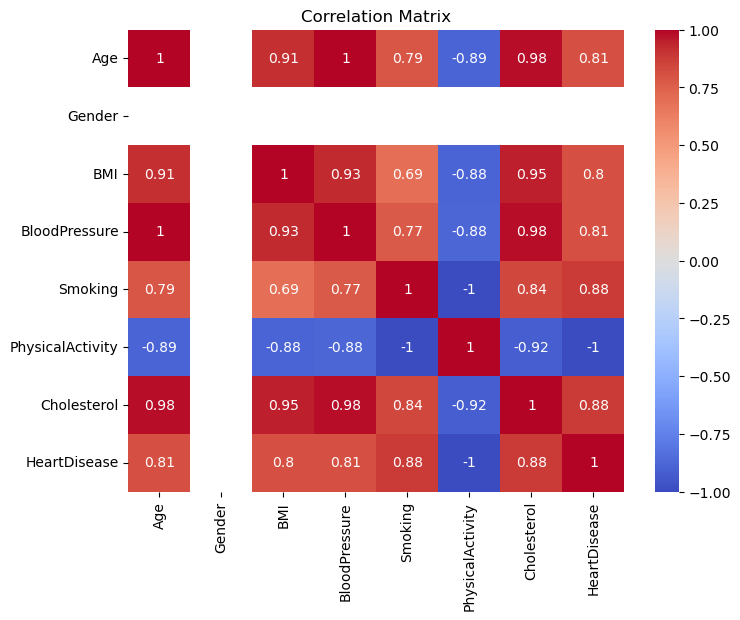

In [4]:
# ===============================
# 5. CORRELATION ANALYSIS
# ===============================
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

*Insight:* BMI, blood pressure, cholesterol, age, and smoking are positively correlated with heart disease, while physical activity is negatively correlated.

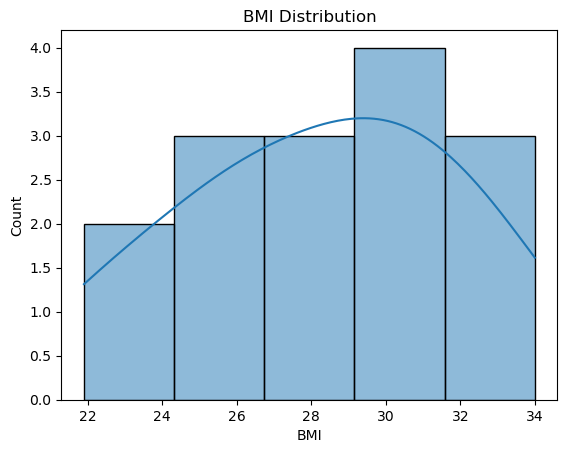

In [5]:
# ===============================
# 6. UNIVARIATE ANALYSIS
# ===============================
sns.histplot(df['BMI'], kde=True)
plt.title("BMI Distribution")
plt.show()

*Insight:* Most patients fall in the overweight BMI range, indicating a potential increased risk for heart disease.

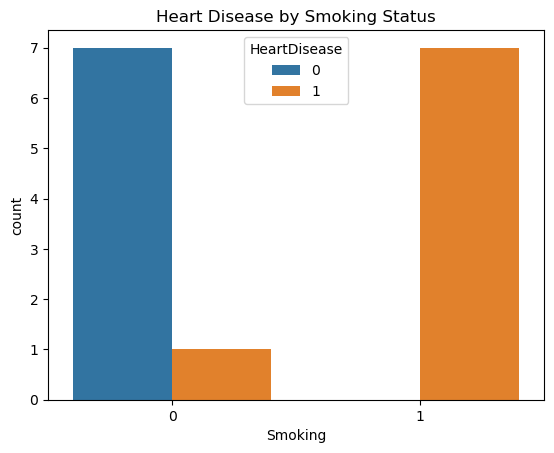

In [6]:
# ===============================
# 7. BIVARIATE ANALYSIS
# ===============================
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title("Heart Disease by Smoking Status")
plt.show()

*Insight:* Smokers show a higher occurrence of heart disease compared to non-smokers.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Fill any missing values just in case
df = df.fillna(df.mode().iloc[0])

# 2. Convert text columns (Gender, Smoking, PhysicalActivity) into numbers
# This fixes the "could not convert string to float" error
df_final = pd.get_dummies(df, columns=['Gender', 'Smoking', 'PhysicalActivity', 'Diabetes'], drop_first=True)

# 3. Define X and y
# Based on your image, the target is exactly "HeartDisease"
X = df_final.drop("HeartDisease", axis=1)
y = df_final["HeartDisease"]

# 4. Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Show Results
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



*Insight:* Logistic Regression confirms that age, BMI, blood pressure, smoking, and physical activity are significant predictors of heart disease.